In [1]:
 # Initial imports
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
# Load the data
file_path = Path("crypto_data.csv")
df_crypto = pd.read_csv(file_path)
df_crypto.head(10)

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
6,2015,2015 coin,X11,True,PoW/PoS,NaN,0
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
9,LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [3]:
#Discard all cryptocurrencies that are not being traded and drop 'IsTrading' column from DF
Trading = (df_crypto['IsTrading'] == True)
Trading_df = df_crypto.loc[Trading]
Trading_df = Trading_df.drop('IsTrading', axis = 1)
Trading_df.head(10)

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
6,2015,2015 coin,X11,PoW/PoS,NaN,0
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
9,LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000


In [4]:
#Drop all rows with at least one null value
Trading_df.dropna(how = 'any', inplace = True)
Trading_df.head(10)

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
9,LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000
10,DASH,Dash,X11,PoW/PoS,9.031294e+06,22000000
11,XMR,Monero,CryptoNight-V7,PoW,1.720114e+07,0
12,ETC,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000


In [5]:
#Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero
Mined = (Trading_df['TotalCoinsMined'] >0)
Mined_df = Trading_df.loc[Mined]
Mined_df.head(10)

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
9,LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000
10,DASH,Dash,X11,PoW/PoS,9.031294e+06,22000000
11,XMR,Monero,CryptoNight-V7,PoW,1.720114e+07,0
12,ETC,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000
13,ZEC,ZCash,Equihash,PoW,7.383056e+06,21000000


In [6]:
# Delete the `CoinName` from the original dataframe
CoinName = Mined_df['CoinName']
Ticker = Mined_df['Unnamed: 0']
Mined_df = Mined_df.drop(['Unnamed: 0','CoinName'], axis = 1)
Mined_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [7]:
#Convert the remaining features with text values, `Algorithm` and `ProofType`, into numerical data
Mined_df['TotalCoinSupply'] = Mined_df['TotalCoinSupply'].astype(float)
Mined_df = pd.get_dummies(Mined_df)
Mined_df.head(10)

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,6.303924e+07,8.400000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,9.031294e+06,2.200000e+07,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
11,1.720114e+07,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,1.133597e+08,2.100000e+08,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,7.383056e+06,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Examine the number of rows and columns of your dataset now. How did they change?

The dataset changed from having 4 Columns with 532 rows to now having 98 columns with 98 rows.

In [8]:
#Standardize your dataset so that columns that contain larger values do not unduly influence the outcome
Scaled = StandardScaler().fit_transform(Mined_df)
Scaled

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

Dimensionality Reduction

In [9]:
#Perform dimensionality reduction with PCA
# Initialize PCA model
pca = PCA(n_components=0.90)

# Get principal components for the data
Crypto_pca = pca.fit_transform(Scaled)

In [10]:
# Transform PCA data to a DataFrame
pd.DataFrame(Crypto_pca).head(10)

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,4.324640e-15,9.752016e-12,-6.226071e-14,-0.007129,-1.319756,-0.051813,...,8.072303e-16,-7.956437e-15,7.872893e-15,2.924671e-15,-3.892443e-16,8.633923e-16,3.052522e-15,4.896091e-15,-4.883682e-15,6.980473e-17
1,-0.318434,1.032331,-0.591126,0.001386,4.295822e-15,9.672416e-12,-6.259683e-14,-0.007739,-1.322514,-0.056674,...,7.557869e-16,-7.815760e-15,7.776851e-15,3.078532e-15,-2.803243e-16,7.583107e-16,3.023820e-15,5.025730e-15,-4.689595e-15,1.064663e-15
2,2.305468,1.656383,-0.683617,0.004731,8.811888e-15,3.304775e-11,-9.075653e-14,-0.054781,-1.542879,-0.943951,...,1.585031e-13,7.673845e-14,-2.595322e-13,2.392680e-14,-6.133749e-14,5.696326e-15,-6.166034e-14,7.925024e-14,1.796626e-14,-2.821501e-15
3,-0.145184,-1.320593,0.192813,-0.001229,-2.835193e-15,-8.578812e-12,2.236011e-14,-0.002071,0.281463,0.251862,...,1.876415e-14,4.910524e-15,-4.078747e-14,3.040192e-15,9.186224e-15,3.091744e-15,-7.759718e-15,1.574858e-14,1.363431e-14,-1.999486e-14
4,-0.151768,-2.036192,0.396182,-0.001705,-7.135403e-15,-1.191114e-11,4.760759e-14,0.027735,0.519099,0.188820,...,-1.681262e-14,-2.808937e-15,1.897747e-13,-8.792341e-14,2.102746e-13,1.220217e-13,-1.844720e-14,7.230983e-14,1.693282e-13,-2.162062e-13
5,-0.165743,-1.125922,-0.012370,-0.000602,-1.302629e-15,-4.205730e-12,1.594125e-15,0.013188,-0.397969,-0.026772,...,6.077770e-15,-2.876542e-15,-1.127119e-15,3.268603e-15,-6.591231e-15,1.989692e-15,-1.139321e-16,7.143933e-15,-5.532971e-15,2.827159e-15
6,-0.395438,1.237148,-0.517551,0.001434,4.224138e-15,1.001249e-11,-5.512768e-14,-0.003507,-0.995206,0.143813,...,-5.568727e-15,-4.588243e-15,6.812431e-15,-1.044471e-15,3.325069e-15,3.270057e-15,2.844535e-15,-2.392022e-15,-3.737127e-15,2.269952e-15
7,-0.149606,-2.223198,0.423077,-0.001835,-1.044515e-14,-1.281789e-11,5.009333e-14,0.032040,0.330794,0.309200,...,8.289027e-14,-3.187045e-13,2.700988e-13,-4.488079e-13,5.099236e-13,-5.037298e-14,7.611392e-14,-1.956142e-13,4.097189e-13,-6.560760e-13
8,-0.150210,-2.036294,0.396162,-0.001703,-6.946061e-15,-1.189674e-11,4.741781e-14,0.027718,0.518802,0.188300,...,-1.662892e-14,-3.852109e-15,1.889539e-13,-8.838021e-14,2.100553e-13,1.204708e-13,-1.862578e-14,7.215550e-14,1.691807e-13,-2.153596e-13
9,-0.149363,-2.049335,0.412968,-0.001745,-4.230975e-15,-1.218337e-11,4.726597e-14,0.028954,0.544389,0.233373,...,2.432137e-15,-1.668221e-15,-6.634129e-15,-4.331366e-15,1.237446e-15,2.364487e-15,9.674409e-16,1.365945e-15,-3.445060e-15,5.342334e-15


In [11]:
#reduce the dataset dimensions with t-SNE and visually inspect the results
from sklearn.manifold import TSNE
# Initialize t-SNE model
tsne = TSNE(learning_rate=35)

# Reduce dimensionality 
Crypto_tsne = tsne.fit_transform(Crypto_pca)

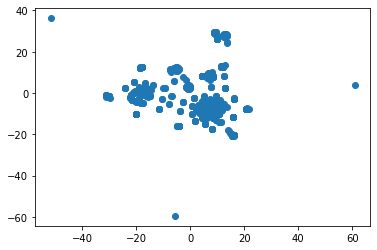

In [12]:
#Then create a scatter plot of the t-SNE output
import matplotlib.pyplot as plt
plt.scatter(Crypto_tsne[:,0], Crypto_tsne[:,1])
plt.show()

Observe whether there are distinct clusters or not: 

Yes, there are distinct clusters with a few outliers. 

Create an elbow plot to identify the best number of clusters. Use a for-loop to determine the inertia for each `k` between 1 through 10. Determine, if possible, where the elbow of the plot is, and at which value of `k` it appears

C:\Users\Stephanie\Python\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


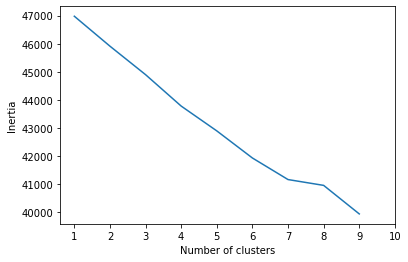

In [13]:
#Elbow plot
inertia = []
k = list(range(1, 10))

for i in k:
    km = KMeans(n_clusters=i)
    km.fit(Crypto_pca)
    inertia.append(km.inertia_)

elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

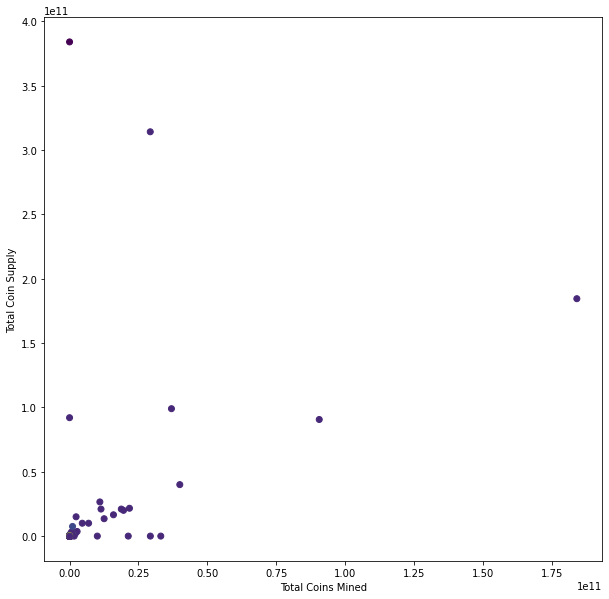

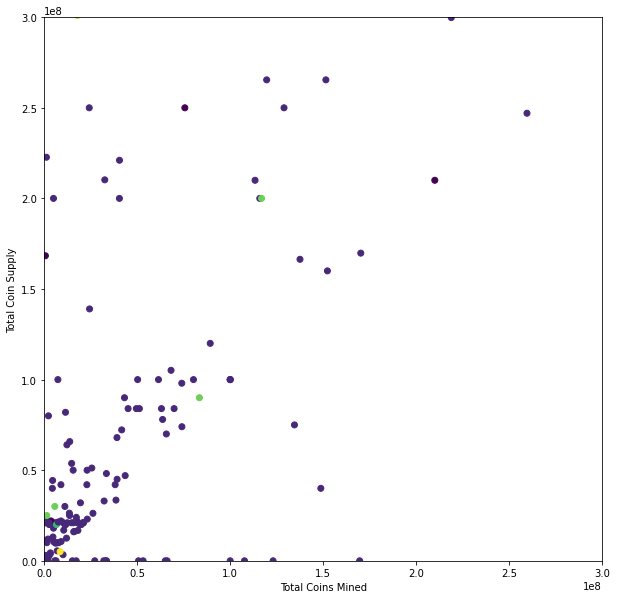

In [15]:
#K-Means initialization 
model = KMeans(n_clusters=10, random_state=0)

# Train the model
model.fit(Scaled)

# Predict clusters
predictions = model.predict(Scaled)

# Create return DataFrame with predicted clusters
Mined_df["cluster"] = pd.Series(model.labels_)


plt.figure(figsize = (10,10))
plt.scatter(Mined_df['TotalCoinsMined'], Mined_df['TotalCoinSupply'], c=Mined_df['cluster'])
plt.xlabel('Total Coins Mined')
plt.ylabel('Total Coin Supply')
plt.show()

plt.figure(figsize = (10,10))
plt.scatter(Mined_df['TotalCoinsMined'], Mined_df['TotalCoinSupply'], c=Mined_df['cluster'])
plt.xlabel('Total Coins Mined')
plt.ylabel('Total Coin Supply')
plt.xlim([0, 300000000])
plt.ylim([0, 300000000])
plt.show()

### Recommendation

* Based on your findings, make a brief (1-2 sentences) recommendation to your clients. Can the cryptocurrencies be clustered together? If so, into how many clusters? 


Based on finding, I would not reccommend clustering the cryptocurrencies together because there is simply still too much data even after running the models for reduction indicating low correlation between cryptocurrencies.